# Clone official YOLOv6 repo from github

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ALPR/src
!git clone https://github.com/meituan/YOLOv6

/content/drive/MyDrive/ALPR/src
fatal: destination path 'YOLOv6' already exists and is not an empty directory.


Install requirements

In [ ]:
%cd /content/drive/MyDrive/ALPR/src/YOLOv6
!pip install -r requirements.txt

/content/drive/MyDrive/ALPR/src/YOLOv6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.1 MB/s eta 0:00:00


In [ ]:
import torch
#check gpu is available or not
torch.cuda.is_available()
torch.cuda.get_device_name()

'Tesla T4'

In [ ]:
%cd /content/drive/MyDrive/ALPR/data
#make directory to store train_images
!mkdir train_images
%cd train_images
#unzip data
!unzip /content/drive/MyDrive/ALPR/data/LP_detection.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: LP_detection/labels/train/CarLongPlateGen3538.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3539.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen354.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3540.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3543.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3544.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3545.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3546.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3547.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3548.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3549.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen355.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3550.txt  
  inflating: LP_detection/labels/train/CarLongPlateGen3551.txt  
  inflating: LP_detection/labels/tr

In [ ]:
%cd /content/drive/MyDrive/ALPR/src/YOLOv6
!rm data/mydataset.yaml

#setup .yaml file for train_set,val_set,data,number of classs, name of class
!echo 'train: /content/drive/MyDrive/ALPR/data/train_images/LP_detection/images/train' >> data/mydataset.yaml
!echo 'val: /content/drive/MyDrive/ALPR/data/train_images/LP_detection/images/val' >> data/mydataset.yaml
!echo 'is_coco: False' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['plate']" >> data/mydataset.yaml

/content/drive/MyDrive/ALPR/src/YOLOv6


# Train YOLOv6

In [ ]:
%cd /content/drive/MyDrive/ALPR/src/YOLOv6
#train yolov6 with tiny arhitecture and use gpu
!python tools/train.py --batch 32 --conf configs/yolov6s.py --data /content/drive/MyDrive/ALPR/src/YOLOv6/data/mydataset.yaml --device 0 --epochs 5


/content/drive/MyDrive/ALPR/src/YOLOv6
2024-12-27 17:16:44.175073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-27 17:16:44.207226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-27 17:16:44.217020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-27 17:16:44.240063: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-1

# Inference YOLOv6


In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0
%cd /content/drive/MyDrive/ALPR/src/YOLOv6
!python tools/infer.py --yaml data/mydataset.yaml --weights /content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt --source /content/drive/MyDrive/ALPR/data/train_images/LP_detection/images/val/CarLongPlate233.jpg --save-txt --save-dir runs/inference/exp/coordinate


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/content/drive/MyDrive/ALPR/src/YOLOv6
Namespace(weights='/content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt', source='/content/drive/MyDrive/ALPR/data/train_images/LP_detection/images/val/CarLongPlate233.jpg', webcam=False, webcam_addr='0', yaml='data/mydataset.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=True, not_save_img=False, save_dir='runs/inference/exp/coordinate', view_img=True, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from /content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt
/content/drive/MyDrive/ALPR/src/YOLOv6/yolov6/utils/che

In [ ]:
!pip install addict
!pip install thop
%cd /content/drive/MyDrive/ALPR/src/YOLOv6
!python tools/eval.py --data data/mydataset.yaml --weights /content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt --device 0

/content/drive/MyDrive/ALPR/src/YOLOv6
Namespace(data='data/mydataset.yaml', weights='/content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt
/content/drive/MyDrive/ALPR/src/YOLOv6/yolov6/utils/checkpoint.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (

# Prepare and train CNN


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
from torch.utils.data import Dataset,DataLoader
from skimage import io
import cv2

from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter

In [ ]:
class LP_Character_Dataset(Dataset):
  def __init__(self,csv_file,root_dir,transform=None) :
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.annotations)

  def __getitem__(self,index):
    img_path = os.path.join(self.root_dir,self.annotations.iloc[index,0])
    image = io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index,1]))

    if self.transform :
      image = self.transform(image)

    return(image,y_label)

In [ ]:
num_classes = 31
learning_rate = 1e-3
batch_size = 4
num_epochs = 200
#display_step = 100
weight_decay = 1e-5
classes = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H"
,"K","L","M","N","P","R","S","T","U","V","X","Y","Z"]
# Model path
checkpoint_lenet = '/content/drive/MyDrive/LP_Character_Dataset_2/lenet.pth'

# device: cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from torchvision.transforms import Grayscale, Resize

transform = transforms.Compose([
    transforms.ToTensor(),
    Resize((32, 32)),  # resize to 32x32
    Grayscale(num_output_channels=1),
    transforms.Normalize((0.5,), (0.5,))
])


dataset = LP_Character_Dataset(csv_file='/content/drive/MyDrive/LP_Character_Dataset_2/licence_plate_character.csv',
                               root_dir='/content/drive/MyDrive/LP_Character_Dataset_2/char_bien_so',
                               transform=transform)
X = 0.8
train_size = int(X * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(dataset = train_set,batch_size = batch_size,shuffle = True )
test_loader = DataLoader(dataset = test_set,batch_size = batch_size,shuffle = False )

In [ ]:
class LeNet(nn.Module):
     def __init__(self):
         super(LeNet, self).__init__()

         # define the layers of the model
         self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
         self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
         self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
         self.fc2 = nn.Linear(in_features=120, out_features=84)
         self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

     def forward(self, x):
         # apply the layers in the model to the input x
         x = self.pool1(torch.relu(self.conv1(x)))
         x = self.pool2(torch.relu(self.conv2(x)))
         x = x.view(x.size(0), -1)  # flatten the output of the pooling layers
         x = torch.relu(self.fc1(x))
         x = torch.relu(self.fc2(x))
         x = self.fc3(x)
         return x


Lenet

In [ ]:
# Load to GPU
model = LeNet().to(device)
summary(model, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 31]           2,635
Total params: 63,491
Trainable params: 63,491
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [ ]:
# Định nghĩa hàm mất mát (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# Sử dụng Adam làm bộ tối ưu, với learning rate và weight decay được chỉ định
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Vòng lặp qua từng epoch
for epoch in range(num_epochs):
    losses = []  # Danh sách lưu giá trị mất mát (loss) của từng batch trong mỗi epoch

    # Vòng lặp qua từng batch trong tập dữ liệu huấn luyện
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Chuyển dữ liệu và nhãn sang thiết bị hiện tại
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Dự đoán đầu ra (forward pass)
        scores = model(data)

        # Tính giá trị mất mát giữa dự đoán và nhãn thực tế
        loss = criterion(scores, targets)

        # Lưu giá trị mất mát của batch hiện tại để tính trung bình sau mỗi epoch
        losses.append(loss.item())

        # Đặt lại gradient về 0 trước khi lan truyền ngược
        optimizer.zero_grad()

        # Lan truyền ngược để tính gradient cho các tham số
        loss.backward()

        # Cập nhật trọng số mô hình dựa trên gradient đã tính
        optimizer.step()

   # Kiểm tra độ chính xác sau mỗi epoch
    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses)}")

    # Check accuracy trên tập kiểm tra
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            correct += (predictions == y).sum().item()
            total += y.size(0)

    accuracy = correct / total * 100
    print(f"Accuracy at epoch {epoch}: {accuracy:.2f}%")

    # Lưu best weights nếu accuracy tốt hơn
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), checkpoint_lenet)
        print(f"Saved best model with accuracy: {best_accuracy:.2f}%")

In [ ]:
#Load model
model.load_state_dict(torch.load(checkpoint_lenet,map_location = torch.device("cpu")))

<ipython-input-32-dcfbe93a6003>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_lenet,map_location = torch.device("cpu")))


<All keys matched successfully>

# Các hàm phụ trợ


Hàm cắt biển số xe dựa vào toạ độ được xác định bởi YOLO (toạ độ này lưu trong file txt)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def crop_and_resize_img(img_path, size_long=(470,110), size_short=(280,200)):
    image_name = os.path.basename(img_path)

    txt_path = "/content/drive/MyDrive/ALPR/src/YOLOv6/runs/inference/exp/coordinate/labels/" + image_name.split(".")[0] + ".txt"
    save_path = "/content/drive/MyDrive/ALPR/src/YOLOv6/runs/inference/exp/crop_image/" + image_name

    # this list is used to store the (standardized) coordinates of the plate
    coordinate = []

    # open the image and store its size
    img = Image.open(img_path)
    a,b=img.size
    try:
        # open the text file and read the coordinates
        with open(txt_path, 'r') as f:
            while True:
                data = f.readline().rstrip()
                if not data:
                    break

                data_list = data.split(" ")
                for i in range(1, 5):
                    coordinate.append(data_list[i])
                x, y, w, h = [float(i) for i in coordinate]

                # convert standardized coordinates to real coordinates
                left = int((x - w/2)*a)
                top = int((y - h/2)*b)
                right = int((x + w/2)*a)
                bottom = int((y + h/2)*b)

                # crop the image using the coordinates
                cropped_im = img.crop((left, top, right, bottom))


                # check the plate in long_size or short_size and resize it
                if w/h>1.5:
                   cropped_im = cropped_im.resize(size_long)
                else :
                   cropped_im = cropped_im.resize(size_short)


                # save the cropped image
                cropped_im.save(save_path)
                coordinate = []  # reset the coordinate list

        # return the cropped image
        return cropped_im, save_path
    except Exception as e:
        print("An error occurred:", e)

In [ ]:
from skimage import measure
from imutils import perspective
import imutils
from skimage.filters import threshold_local
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import functools
import torchvision.transforms as transforms
import time
import torch

def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 27:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]

def segment_and_predict(save_path, target_width = 32, target_height = 32 ):
    start = time.time()

    image = cv2.imread(save_path)
    cv2_imshow(image)

    # To gray scalescale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    # make blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    cv2_imshow(blurred)
    # adaptiveThreshold
    thresh = cv2.adaptiveThreshold(blurred, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)
    cv2_imshow(thresh)

    _, labels = cv2.connectedComponents(thresh)
    mask = np.zeros(thresh.shape, dtype="uint8")
    total_pixels = image.shape[0] * image.shape[1]
    lower = total_pixels//95 # heuristic param, can be fine tuned if necessary
    upper = total_pixels//30

    for (i, label) in enumerate(np.unique(labels)):
        # for the current label
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)

        # If the number of pixels in the component is between lower bound and upper bound,
        # add it to our mask
        if numPixels > lower and numPixels < upper:
          mask = cv2.add(mask, labelMask)
    cv2_imshow(mask)
    cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]

    boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare))
    results = []
    for rect in boundingBoxes:
        # Get the coordinates from the bounding box
        x,y,w,h = rect

        if h / w > 4 or w /h >4:
          continue
        # Crop the character from the mask
        crop = mask[y:y+h, x:x+w]
        # cv2_imshow(crop)

        h= crop.shape[0]
        w= crop.shape[1]

        if 4 > h/w >= 2.5:
            crop = cv2.bitwise_not(crop)
            rows = crop.shape[0]
            columns = crop.shape[1]
            paddingY = int(0 * rows)
            paddingX = int(0.15 * columns)

            # Apply padding to make the image fit for neural network model
            crop = cv2.copyMakeBorder(crop, paddingY, paddingY, paddingX, paddingX, cv2.BORDER_CONSTANT, None, 255)
            crop = cv2.bitwise_not(crop)

        # Convert and resize image
        crop = cv2.resize(crop, (target_width, target_height))
        cv2_imshow(crop)
        # Convert to tensor without changing to 3 channels
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))  # Normalize for 1 channel
        ])
        crop = transform(crop).unsqueeze(0)  # Add batch dimension

        # Move data to the same device as the model
        data = crop.to(device)

        # Forward pass through the model
        output = model(data)
        output = F.log_softmax(output, dim=1)
        pred = output.argmax(dim=1, keepdim=True)
        label = pred[0][0].detach().cpu().numpy()
        final = classes[label]
        results.append(final)

    return ''.join(results)



# End to end

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [ ]:
class LeNet(nn.Module):
     def __init__(self):
         super(LeNet, self).__init__()

         # define the layers of the model
         self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
         self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
         self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
         self.fc2 = nn.Linear(in_features=120, out_features=84)
         self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

     def forward(self, x):
         # apply the layers in the model to the input x
         x = self.pool1(torch.relu(self.conv1(x)))
         x = self.pool2(torch.relu(self.conv2(x)))
         x = x.view(x.size(0), -1)  # flatten the output of the pooling layers
         x = torch.relu(self.fc1(x))
         x = torch.relu(self.fc2(x))
         x = self.fc3(x)
         return x


In [ ]:
num_classes = 31
device = "cuda" if torch.cuda.is_available() else "cpu"
classes = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H"
,"K","L","M","N","P","R","S","T","U","V","X","Y","Z"]
checkpoint_lenet = '/content/drive/MyDrive/LP_Character_Dataset_2/lenet.pth'

# Load to GPU
model = LeNet().to(device)
summary(model, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 31]           2,635
Total params: 63,491
Trainable params: 63,491
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [ ]:
#Load model
model.load_state_dict(torch.load(checkpoint_lenet,map_location = torch.device("cuda")))

<ipython-input-8-a9fa47ed4b07>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_lenet,map_location = torch.device("cuda")))


<All keys matched successfully>

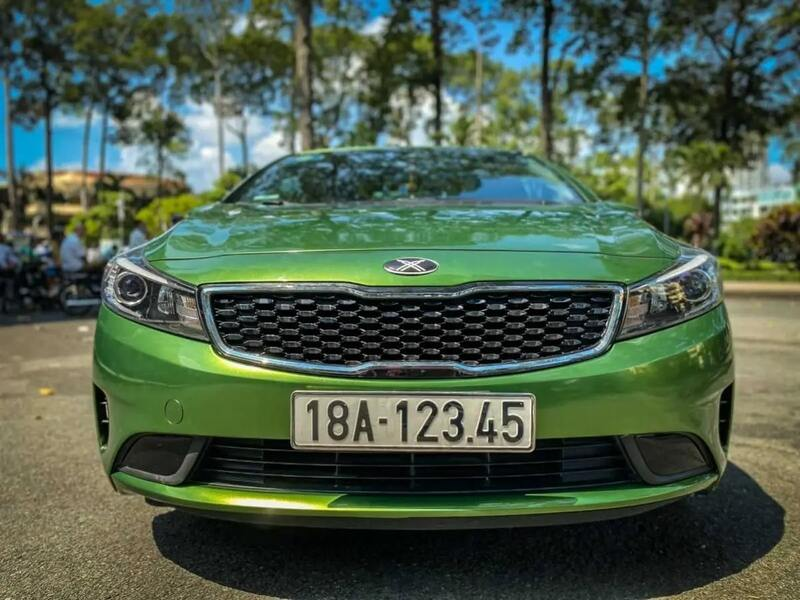

/content/drive/MyDrive/ALPR/src/YOLOv6
Namespace(weights='/content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt', source='/content/123.jpg', webcam=False, webcam_addr='0', yaml='data/mydataset.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=True, not_save_img=False, save_dir='runs/inference/exp/coordinate', view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from /content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt
/content/drive/MyDrive/ALPR/src/YOLOv6/yolov6/utils/checkpoint.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytor

In [ ]:
# đường dẫn ảnh đầu vào
image_path = "/content/123.jpg"
image = cv2.imread(image_path)
cv2_imshow(image)

# thực hiện detect biển số xe trên ảnh đầu vào sử dụng yolov6
%cd /content/drive/MyDrive/ALPR/src/YOLOv6
!python tools/infer.py --yaml data/mydataset.yaml --weights /content/drive/MyDrive/ALPR/src/YOLOv6/runs/train/exp3/weights/best_ckpt.pt --source {image_path} --save-txt --save-dir runs/inference/exp/coordinate

# cắt biển số xe dựa trên thông tin dự đoán từ file txt của yolov6 và lưu vào saved_path
cropped_img , saved_path = crop_and_resize_img(img_path = image_path)
plt.imshow(cropped_img)

# dự đoán biển số xe
result = segment_and_predict(saved_path)

print("###Predict results###:", result)

Nhận diện biển số từ ảnh đầu vào